In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
## 1-a
# Load Package & Data
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.data', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.labels', header = None)

valid_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.data', sep = "\s+", header = None)
valid_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.labels', header = None)

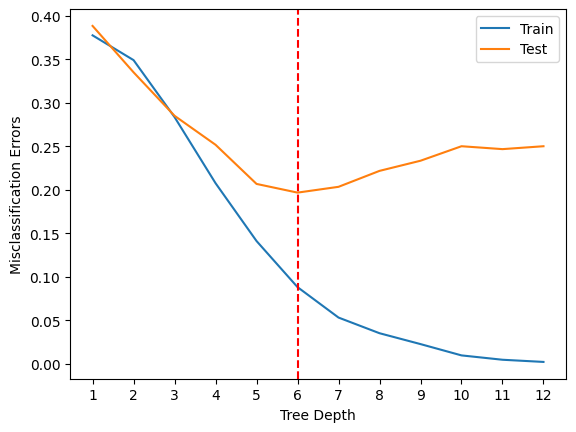

In [4]:
# Fitting Decision Tree Model
train_mis = []
test_mis = []
for depth_num in range(12) :
  clf = tree.DecisionTreeClassifier(max_depth = depth_num + 1)
  clf = clf.fit(train_data, train_label)
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(valid_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, valid_label))

# Plotting
plt.plot(np.arange(1, 13), train_mis)
plt.plot(np.arange(1, 13), test_mis)
plt.axvline(x = np.argmin(test_mis)+1, color = 'red', linestyle = 'dashed')
plt.xticks(np.arange(1, 13))
plt.legend(['Train', 'Test'])
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Errors')
plt.show()

In [5]:
test_table = pd.DataFrame({'Tree Depth' : np.arange(1, 13), 'Test Error' : test_mis})
print(test_table)

    Tree Depth  Test Error
0            1    0.388333
1            2    0.335000
2            3    0.285000
3            4    0.251667
4            5    0.206667
5            6    0.196667
6            7    0.203333
7            8    0.221667
8            9    0.233333
9           10    0.250000
10          11    0.246667
11          12    0.250000


In [7]:
## 1-b
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/X.dat', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/Y.dat', header = None)

test_data = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/Xtest.dat', sep = "\s+", header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/Ytest.dat', header = None)

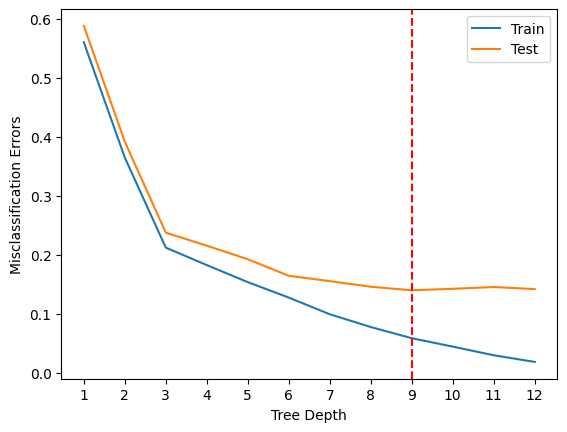

In [9]:
# Fitting Decision Tree Model
train_mis = []
test_mis = []
for depth_num in range(12) :
  clf = tree.DecisionTreeClassifier(max_depth = depth_num + 1)
  clf = clf.fit(train_data, train_label)
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(test_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, test_label))

# Plotting
plt.plot(np.arange(1, 13), train_mis)
plt.plot(np.arange(1, 13), test_mis)
plt.axvline(x = np.argmin(test_mis)+1, color = 'red', linestyle = 'dashed')
plt.xticks(np.arange(1, 13))
plt.legend(['Train', 'Test'])
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Errors')
plt.show()

In [10]:
test_table = pd.DataFrame({'Tree Depth' : np.arange(1, 13), 'Test Error' : test_mis})
print(test_table)

    Tree Depth  Test Error
0            1      0.5875
1            2      0.3915
2            3      0.2375
3            4      0.2155
4            5      0.1925
5            6      0.1645
6            7      0.1555
7            8      0.1460
8            9      0.1400
9           10      0.1425
10          11      0.1455
11          12      0.1420


In [12]:
## 1-c
# Load Package & Data
from sklearn.ensemble import RandomForestClassifier

train_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.data', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.labels', header = None)

valid_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.data', sep = "\s+", header = None)
valid_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.labels', header = None)

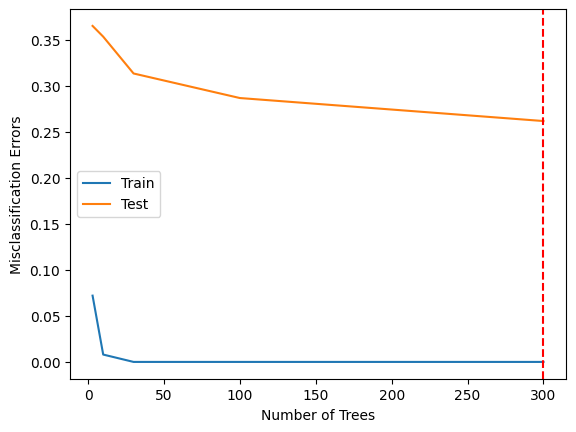

In [13]:
# Fitting Random Forest Models
k = [3, 10, 30, 100, 300]

train_mis = []
test_mis = []
for i in k :
  clf = RandomForestClassifier(n_estimators = i, max_features = 'sqrt')
  clf = clf.fit(train_data, train_label.values.ravel())
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(valid_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, valid_label))

# Plotting
plt.plot(k, train_mis)
plt.plot(k, test_mis)
plt.axvline(x = k[np.argmin(test_mis)], color = 'red', linestyle = 'dashed')
plt.legend(['Train', 'Test'])
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Errors')
plt.show()

In [14]:
test_table = pd.DataFrame({'Number of Trees' : k, 'Test Error' : test_mis})
print(test_table)

   Number of Trees  Test Error
0                3    0.365000
1               10    0.353333
2               30    0.313333
3              100    0.286667
4              300    0.261667


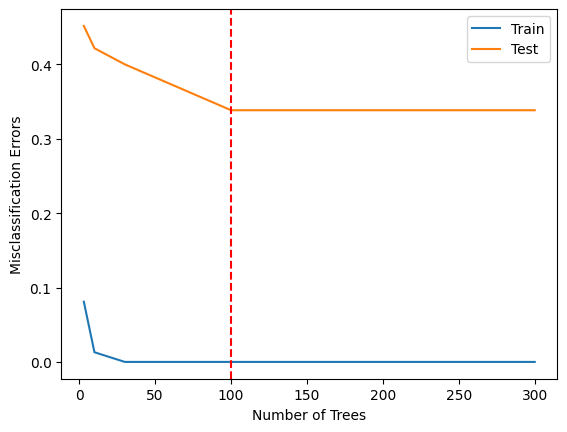

In [15]:
## 1-d

train_mis = []
test_mis = []
for i in k :
  clf = RandomForestClassifier(n_estimators = i, max_features = 'log2')
  clf = clf.fit(train_data, train_label.values.ravel())
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(valid_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, valid_label))

# Plotting
plt.plot(k, train_mis)
plt.plot(k, test_mis)
plt.axvline(x = k[np.argmin(test_mis)], color = 'red', linestyle = 'dashed')
plt.legend(['Train', 'Test'])
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Errors')
plt.show()

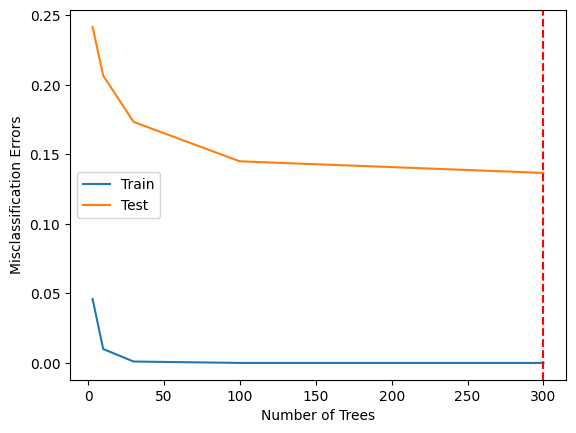

In [16]:
## 1-e

train_mis = []
test_mis = []
for i in k :
  clf = RandomForestClassifier(n_estimators = i, max_features = None)
  clf = clf.fit(train_data, train_label.values.ravel())
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(valid_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, valid_label))

# Plotting
plt.plot(k, train_mis)
plt.plot(k, test_mis)
plt.axvline(x = k[np.argmin(test_mis)], color = 'red', linestyle = 'dashed')
plt.legend(['Train', 'Test'])
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Errors')
plt.show()